In [4]:
import os, sys, time
sys.path.append("../src")

from tqdm import tqdm
import numpy as np
import json
from utils.constant import ViTExperiment
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("ticks")

In [5]:
ds_name = "c10"
num_labels = 10

In [6]:
kn_dir = os.path.join(getattr(ViTExperiment, ds_name).OUTPUT_DIR, "neuron_scores")
for method in ["base", "ig_list"]:
    cnt = []
    for tgt_label in range(num_labels):
        kn_path = os.path.join(kn_dir, f"{method}_l9tol12_{tgt_label}.json")
        json_data = json.load(open(kn_path, "r"))
        cnt.append(json_data["num_kn_per_layer"])
    cnt = np.array(cnt)
    df = pd.DataFrame([])
    for dic in cnt:
        dic["total"] = sum(dic.values())
        df = df.append(dic, ignore_index=True)
    # dfのデータ型を整数にする
    df = df.astype(int)
    display(df)
    # 11層めの合計 / total列の合計 を%表示
    print(f"11th layer: {df['11'].sum() / df['total'].sum() * 100:.2f}%")

,9,10,11,total
0,2,0,10,12
1,2,0,10,12
2,2,0,10,12
3,2,0,10,12
4,2,0,10,12
5,2,0,10,12
6,2,0,10,12
7,2,0,10,12
8,2,0,10,12
9,2,0,10,12


11th layer: 83.33%


,9,10,11,total
0,0,0,110,110
1,0,0,103,103
2,0,0,113,113
3,0,0,45,45
4,0,0,80,80
5,0,0,105,105
6,0,24,81,105
7,0,0,101,101
8,0,0,101,101
9,0,0,108,108


11th layer: 97.53%


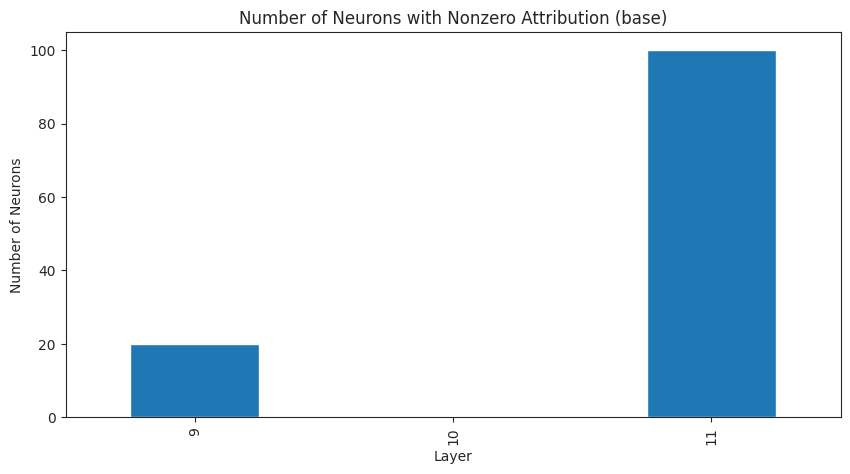

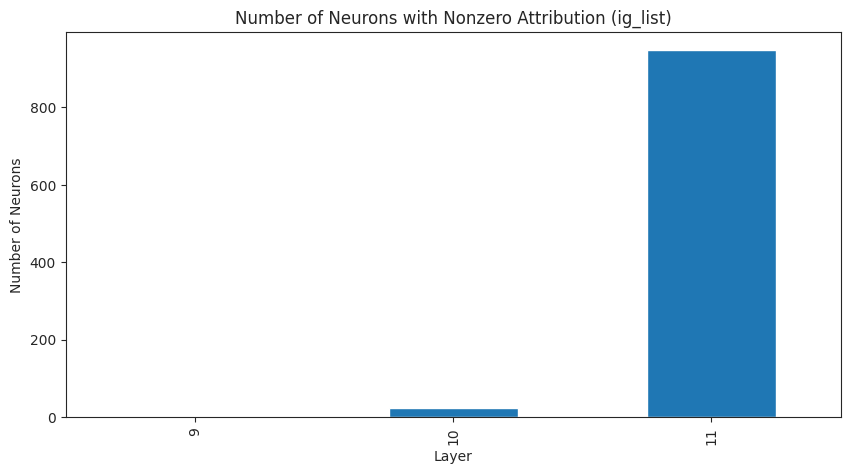

In [8]:
# 上の表をヒストグラムで表示
for method in ["base", "ig_list"]:
    cnt = []
    for tgt_label in range(num_labels):
        kn_path = os.path.join(kn_dir, f"{method}_l9tol12_{tgt_label}.json")
        json_data = json.load(open(kn_path, "r"))
        cnt.append(json_data["num_kn_per_layer"])
    cnt = np.array(cnt)
    df = pd.DataFrame([])
    for dic in cnt:
        dic["total"] = sum(dic.values())
        df = df.append(dic, ignore_index=True)
    # dfのデータ型を整数にする
    df = df.astype(int)
    # ヒストグラムを表示
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    df.drop("total", axis=1).sum().plot(kind="bar", ax=ax)
    ax.set_title(f"Number of Neurons with Nonzero Attribution ({method})")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Number of Neurons")
    plt.show()

In [9]:
ds_name = "c100"
num_labels = 100

In [10]:
kn_dir = os.path.join(getattr(ViTExperiment, ds_name).OUTPUT_DIR, "neuron_scores")
for method in ["base", "ig_list"]:
    cnt = []
    for tgt_label in range(num_labels):
        kn_path = os.path.join(kn_dir, f"{method}_l9tol12_{tgt_label}.json")
        json_data = json.load(open(kn_path, "r"))
        cnt.append(json_data["num_kn_per_layer"])
    cnt = np.array(cnt)
    df = pd.DataFrame([])
    for dic in cnt:
        dic["total"] = sum(dic.values())
        df = df.append(dic, ignore_index=True)
    # dfのデータ型を整数にする
    df = df.astype(int)
    display(df)
    # 11層めの合計 / total列の合計 を%表示
    print(f"11th layer: {df['11'].sum() / df['total'].sum() * 100:.2f}%")

,9,10,11,total
0,0,0,12,12
1,0,0,12,12
2,0,0,12,12
3,0,0,12,12
4,0,0,12,12
...,...,...,...,...
95,0,0,12,12
96,0,0,12,12
97,0,0,12,12
98,0,0,12,12


11th layer: 100.00%


,9,10,11,total
0,0,0,58,58
1,0,0,43,43
2,4,16,97,117
3,0,0,53,53
4,0,0,43,43
...,...,...,...,...
95,0,0,60,60
96,0,0,70,70
97,0,0,37,37
98,0,5,125,130


11th layer: 92.51%


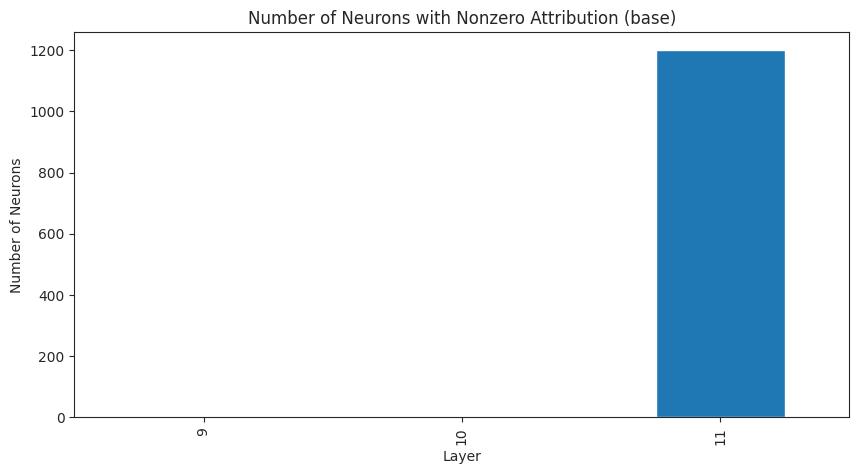

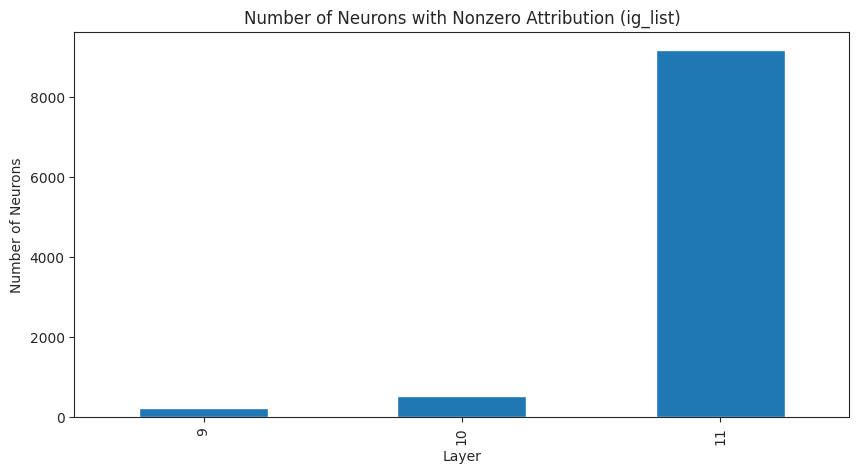

In [11]:
# 上の表をヒストグラムで表示
for method in ["base", "ig_list"]:
    cnt = []
    for tgt_label in range(100):
        kn_path = os.path.join(kn_dir, f"{method}_l9tol12_{tgt_label}.json")
        json_data = json.load(open(kn_path, "r"))
        cnt.append(json_data["num_kn_per_layer"])
    cnt = np.array(cnt)
    df = pd.DataFrame([])
    for dic in cnt:
        dic["total"] = sum(dic.values())
        df = df.append(dic, ignore_index=True)
    # dfのデータ型を整数にする
    df = df.astype(int)
    # ヒストグラムを表示
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    df.drop("total", axis=1).sum().plot(kind="bar", ax=ax)
    ax.set_title(f"Number of Neurons with Nonzero Attribution ({method})")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Number of Neurons")
    plt.show()